In [3]:
"""LCR meter only"""
from Functions_A import *
from Functions_B import *
import datetime
import matplotlib.pyplot as plt
start_runtime = time.time()

# connect to the LCR meter
ser_lcr = DeviceConnect('/dev//cu.usbserial-A94IP9Y2')  # LCR Meter

freq = Frequencies(1*10, 100*1000, 10) # start, stop, number of points in-between (log spaced) 
# 10 Hz - 100 kHz (2 - 5 in log space) 

# mainReadings = ["R", "C", "L", "Z"]   (Ohm, H, C, Ohm) 
# minorReadings = ["X", "D", "Q", "THR" (θ), "ESR"] (Ohm, None, None, deg, Ohm) 
mainReadings = ['C'] # can add multiple readings
minorReadings = ['ESR'] # can add multiple readings
voltage = 1 # AC voltage (V)
biasVoltage = 0 # DC bias voltage. set to None if no bias is needed. 
numMeasurements = 3 

#chamber v7.3 dimensions
height = 34 # mm
ir = 4.1 # mm
area = np.pi*ir**2 # mm^2     
area = round(area, 2)
thickness = height  # mm
timestamp = time.strftime("%H%M")

try:    
    material = input('Material? ')
    params = [material, mainReadings, minorReadings]
    info = f'{area}, Area (mm^2), {thickness}, Thickness (mm), {voltage}, V, n={numMeasurements}'
    dataFrame = Experiment(ser_lcr, freq, mainReadings, minorReadings, voltage, biasVoltage, numMeasurements)

    DataExport(params, dataFrame, info, timestamp)

except Exception as e:
    print(f'Test Aborted: {e}')
    if 'dataFrame' in locals():
        info = f'{area}, mm^2, {thickness}, mm, {voltage}, V, n={numMeasurements}'
        DataExport(params, dataFrame, info, timestamp)
        print("!!! Partial data saved.")

finally:
    DeviceDisconnect(ser_lcr)

end_runtime = time.time()
print(f"Total runtime = {round(end_runtime - start_runtime, 2)} seconds")

# LCRCommander(ser_lcr, 'SYST:REM') # remote mode
# LCRCommander(ser_lcr, 'SYST:LOC') # local mode

   Frequency        C Avg.        C Std.  C-ESR Avg.  C-ESR Std.
0         10  9.604283e-05  7.259630e-09   19.693400    0.002687
1         28  8.704927e-05  6.933173e-09   10.753633    0.029672
2         77  7.660050e-05  1.329361e-08    5.853757    0.003526
3        215  6.471027e-05  2.804857e-08    3.332407    0.000561
4        599  4.955720e-05  1.739483e-08    2.190200    0.001329
5       1668  2.468153e-05  4.872768e-06    1.861333    0.234467
6       4642  9.535607e-06  3.996153e-07    1.550653    0.103208
7      12915  2.541193e-06  5.515551e-07    1.410757    0.047902
8      35938  6.567090e-07  8.229380e-08    1.326443    0.035763
9     100000  2.500857e-07  2.477826e-08    1.255167    0.032671
Test completed


Total runtime = 52.57 seconds


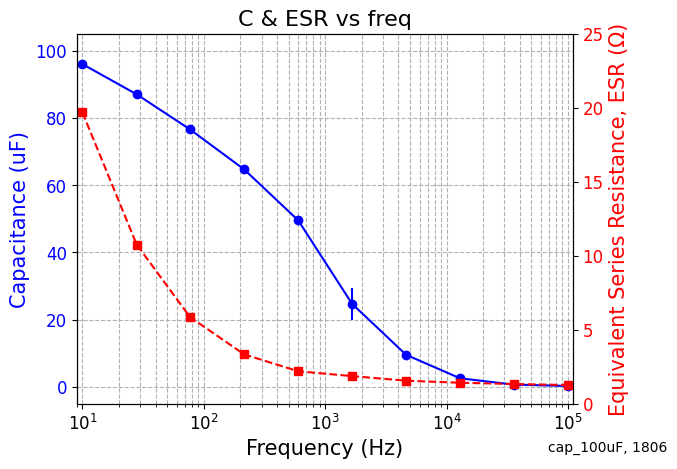

In [4]:
fig, ax1 = plt.subplots()

# Left Y-axis (Major param)
ax1.errorbar(
    dataFrame['Frequency'], dataFrame['C Avg.']*1000000, yerr=dataFrame['C Std.']*1000000,
    fmt='o-', color='blue')
ax1.set_xlabel('Frequency (Hz)',fontsize=15)
ax1.set_ylabel('Capacitance (uF)', color='blue',fontsize=15)
ax1.set_xscale('log')
ax1.set_xlim(freq[0]*0.9, freq[-1]*1.1)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelcolor='blue',labelsize=12)
ax1.text(0.95, -0.13, f'{material}, {timestamp}',
         transform=ax1.transAxes, fontsize=10)
ax1.set_ylim(-5,105)

# Right y-axis (Minor param)
ax2 = ax1.twinx()
ax2.errorbar(
    dataFrame['Frequency'], dataFrame['C-ESR Avg.'], yerr=dataFrame['C-ESR Std.'],
    fmt='s--', color='red')
ax2.set_ylabel('Equivalent Series Resistance, ESR (Ω)', color='red',fontsize=15)
ax2.tick_params(axis='y', labelcolor='red',labelsize=12)
ax2.set_ylim(0,25)

# 
ax1.grid(True, which='both', ls='--')
plt.title('C & ESR vs freq', fontsize=16)
plt.show()